# Exploratory Data Analysis (EDA) on a Home Loan dataset

This project conduct an in-depth Exploratory Data Analysis (EDA) on a Home Loan dataset. The objective is to understand the underlying structure, trends, and relationships in the data through data cleaning, visualization, and statistical analysis. This initial investigation is essential for uncovering patterns that may influence loan approvals and risk assessment. 
Financial institutions rely on historical loan data to assess creditworthiness and refine their lending practices. The Home Loan dataset contains key information on applicants, such as income, employment status, credit history, and property details, along with the corresponding loan outcomes.

## Phase 1: Data Collection and Preparation

### Task 1.1: Load the Home Loan dataset into a Pandas DataFrame

In [1]:
# importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stat 


In [2]:
# loading data
# path to the train data
train_dt_path= "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

# path to the test data
test_dt_path = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"

# load the train data
train_data = pd.read_csv(train_dt_path)

# load the test data
test_data = pd.read_csv(test_dt_path)

In [3]:
# view train data head
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# view test data head
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
# snap shot of the data
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# checking the data snapshot
train_data.shape

(614, 13)

In [7]:
# checking the data snapshot
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.

In [8]:
# checking the missig data
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# checking the duplicate data
train_data.duplicated().sum()

0

In [10]:
# Checking data type inconsistencies
print(train_data.dtypes)
train_data.head(10)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Task 1.3: Clean the dataset by handling missing values, correcting data types, and addressing outliers.

**The column with null values**
-   Gender              13
-   Married             3
-   Dependents          15
-   Self_Employed       32
-   LoanAmount          22
-   Loan_Amount_Term    14
-   Credit_History      50

**No duplicate data**

**What to correct for data type inconsistencies:**
-   Dependents to int8 but first change 3+ to 3
-   ApplicationIncome to float64
-   loan_amount_term to int16
-   Credit_History to int8




#### Handling missing values

In [ ]:
# let start with most important field from this missing

# Based on assumption that, if loanAmount is not specified, 
# it means it is not a valid loan record.

# count missing values
no_of_record=train_data["LoanAmount"].isnull().sum()

# drop rows where loan amount is missing
train_data.dropna(subset=["LoanAmount"], inplace=True)
print(f"{no_of_record} records were removed, because loanAmount is not specified")

22 records were removed, because loanAmount is not specified


In [12]:
# let check the list of missing data again
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Based on assumption that, if loan_Amount_term is not specified, 
# it means it is not a valid loan record.

# count missing values
no_of_record = train_data["Loan_Amount_Term"].isnull().sum()

# drop rows where loan amount term is missing
train_data.dropna(subset=["Loan_Amount_Term"], inplace=True)

print(f"{no_of_record} records were removed because Loan_Amount_Term was missing")


14 records were removed because Loan_Amount_Term was missing


In [14]:
# let check the list of missing data again
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           12
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# Based on the data description that
# Credit history of the applicant has 1 for good and 0 for bad or missing).
# Therefore let fill the missing with zero

# count missing values
no_of_record = train_data["Credit_History"].isnull().sum()

# drop rows where loan amount term is missing
train_data["Credit_History"]=train_data["Credit_History"].fillna(0)

print(f"{no_of_record} missing Credit_History values were replaced with 0")


49 missing Credit_History values were replaced with 0


In [ ]:
# We have Only 3 missing for married data
# let fill it with the most frequent marital status to avoid losing data.

# count missing values
no_of_record = train_data["Married"].isnull().sum()

train_data["Married"]= train_data["Married"].fillna(train_data["Married"].mode()[0])
print(f"{no_of_record} missing Marital status values were replaced with the most common (mode)")

2 missing Marital status values were replaced with the mode common


In [ ]:
# Missing gender is usually due to data entry errors,not meaningful absence. 
# If we fill it with the most common gender it will preserves dataset balance.

# count missing values
no_of_record = train_data["Gender"].isnull().sum()

train_data["Gender"]= train_data["Gender"].fillna(train_data["Gender"].mode()[0])
print(f"{no_of_record} missing Gender values were replaced with the most common(mode)")


13 missing Gender values were replaced with the mode common


In [ ]:
# Let fill the self_employed with the most common data.

# count missing values
no_of_record = train_data["Self_Employed"].isnull().sum()

train_data["Self_Employed"]= train_data["Self_Employed"].fillna(train_data["Self_Employed"].mode()[0])
print(f"{no_of_record} missing Self_Employed status values were replaced with the most common (mode)")


30 missing Self_Employed status values were replaced with the mode common


In [ ]:
# Let fill the dependents with the most common data.

# count missing values
no_of_record = train_data["Dependents"].isnull().sum()

train_data["Dependents"]= train_data["Dependents"].fillna(train_data["Dependents"].mode()[0])
print(f"{no_of_record} missing Dependents values were replaced with the most common (mode)")


12 missing Dependents values were replaced with the mode common


#### Correcting data types

In [20]:
# What to correct for data type inconsistencies:
# -   Dependents to int8 but first change 3+ to 3
# -   ApplicationIncome to float64
# -   loan_amount_term to int16
# -   Credit_History to int8

# let convert 3+ to 3 first
train_data["Dependents"]= train_data["Dependents"].replace("3+", 3)

train_data= train_data.astype({
    "Dependents": "int8",
    "ApplicantIncome": "float64",
    "Loan_Amount_Term" : "int16",
    "Credit_History" : "int8"
})

# let verify the chnages
print(train_data.dtypes)
train_data.head(10)

Loan_ID               object
Gender                object
Married               object
Dependents              int8
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int16
Credit_History          int8
Property_Area         object
Loan_Status           object
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360,1,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036.0,2504.0,158.0,360,0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006.0,1526.0,168.0,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360,1,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200.0,700.0,70.0,360,1,Urban,Y


#### Addressing outliers

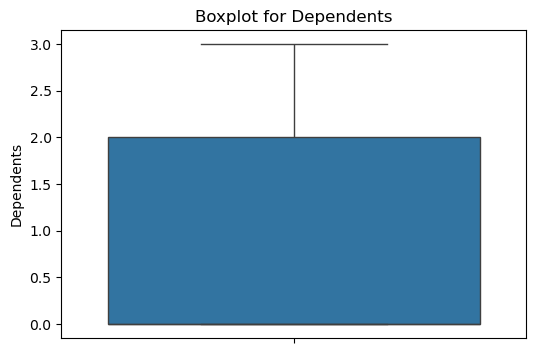

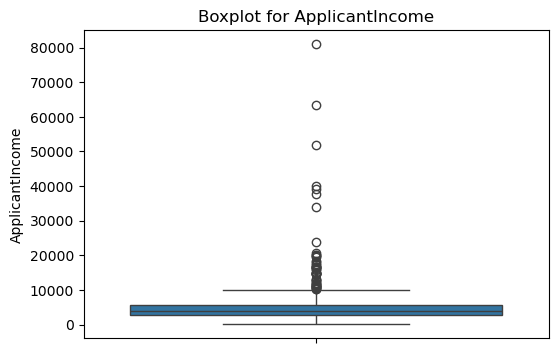

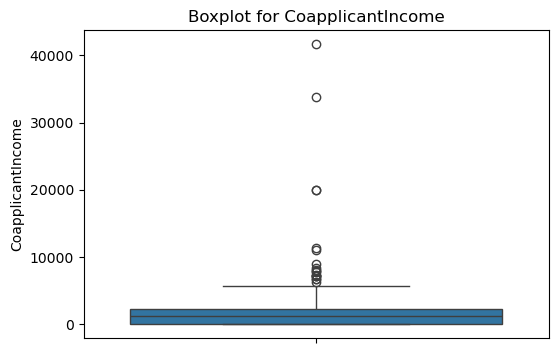

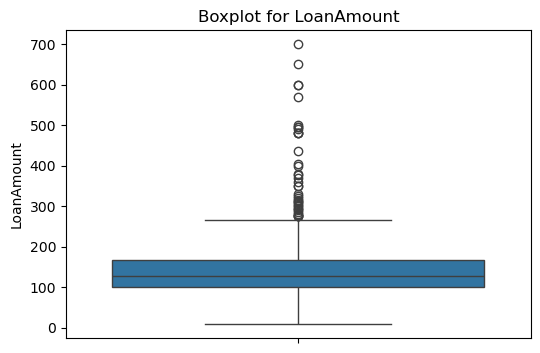

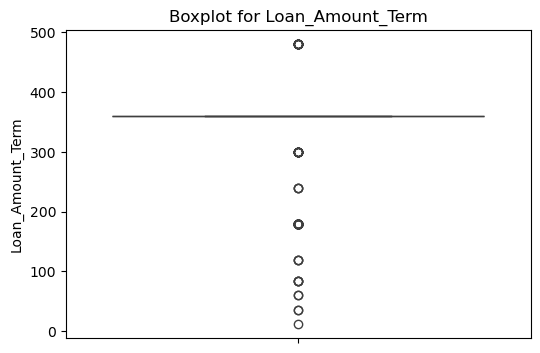

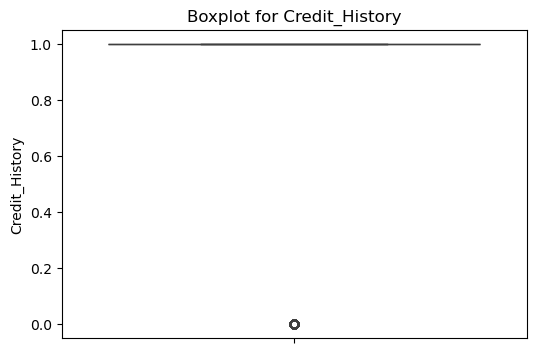

In [24]:
# let check for the outliers using box plot for all the numerical data
numerical_cols= ["Dependents","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]

# plotting for each features
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=train_data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

## Phase 2: Exploratory Data Analysis (EDA)

### Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.

In [22]:
# Let get basic info about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            578 non-null    object 
 1   Gender             578 non-null    object 
 2   Married            578 non-null    object 
 3   Dependents         578 non-null    int8   
 4   Education          578 non-null    object 
 5   Self_Employed      578 non-null    object 
 6   ApplicantIncome    578 non-null    float64
 7   CoapplicantIncome  578 non-null    float64
 8   LoanAmount         578 non-null    float64
 9   Loan_Amount_Term   578 non-null    int16  
 10  Credit_History     578 non-null    int8   
 11  Property_Area      578 non-null    object 
 12  Loan_Status        578 non-null    object 
dtypes: float64(3), int16(1), int8(2), object(7)
memory usage: 51.9+ KB


From the infomation above we can see that our data doesn't have any missing value again and all the data type are correct and we are able to use lesser memory.

In [23]:
# let do summary of statistics for numeric columns
train_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,0.756055,5435.138408,1640.482561,147.143599,342.145329,0.778547
std,1.011720,6229.382997,2993.270767,86.342523,65.442101,0.415585
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2890.250000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3812.500000,1211.500000,128.000000,360.000000,1.000000
75%,2.000000,5795.000000,2281.000000,168.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.

### Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.


### Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.



### Task 2.5: Identify trends, anomalies, and patterns that could impact loan outcomes.


## Phase 3: Reporting and Insights

### Task 3.1: Summarize key findings and insights derived from the EDA.

### Task 3.2: Create comprehensive visualizations and dashboards to communicate your insights effectively.

### Task 3.3: Document the EDA process and prepare a detailed report outlining methodology, analysis, and recommendations for further investigation.